# Computational Linear Algebra
### Applying dimensionality reduction to images

Juan Camilo Sarmiento - Equinox - Plan Semilla - Data Science

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
import cv2
import os
import glob

Load dataset:

dataset from: https://www.kaggle.com/datasets/trolukovich/food11-image-dataset

In [58]:
Dataset="Food"
folders=["evaluation","training","validation"]
categories=os.listdir(os.path.join("Food",folders[0]))
eval_images = []
eval_labels = []
train_images = []
train_labels = []
val_images = []
val_labels = []
for folder in categories:
    # Read images from evaluation directory
    eval_folder = os.path.join(os.getcwd(),Dataset,folders[0], folder)
    eval_images.extend([cv2.imread(img_path) for img_path in glob.glob(os.path.join(eval_folder, '*.jpg'))])
    eval_labels.extend([folder] * len(os.listdir(eval_folder)))  # add labels for each image

    # Read images from training directory
    train_folder = os.path.join(os.getcwd(),Dataset,folders[1], folder)
    train_images.extend([cv2.imread(img_path) for img_path in glob.glob(os.path.join(train_folder, '*.jpg'))])
    train_labels.extend([folder]* len(os.listdir(train_folder))) 

    # Read images from validation directory
    val_folder = os.path.join(os.getcwd(),Dataset,folders[2], folder)
    val_images.extend([cv2.imread(img_path) for img_path in glob.glob(os.path.join(val_folder, '*.jpg'))])
    val_labels.extend([folder] * len(os.listdir(val_folder)))  # add labels for each image


In [22]:
def average_size(images):
    shapes = [img.shape for img in images]
    return np.round(np.mean(shapes, axis=0)).astype(int)

def resize_images(training,evaluation,validation,scale_average):
    avg_shape=average_size(training+evaluation+validation)
    width = int(avg_shape[1] * scale_average / 100)
    height = int(avg_shape[0] * scale_average / 100)
    dim = (width, height)

    for i,image in enumerate(training):
        training[i]=cv2.resize(image,dim,interpolation=cv2.INTER_AREA)
    for i,image in enumerate(evaluation):
        evaluation[i]=cv2.resize(image,dim,interpolation=cv2.INTER_AREA)
    for i,image in enumerate(validation):
        validation[i]=cv2.resize(image,dim,interpolation=cv2.INTER_AREA)

    return    #dont return values as it changes values in place in the lists

resize_images(train_images,eval_images,val_images,50)


In [24]:
train_images[0].shape,eval_images[0].shape,val_images[0].shape

((248, 266, 3), (248, 266, 3), (248, 266, 3))

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(train_labels)

train_numeric_labels = label_encoder.transform(train_labels)
train_numeric_labels

array([ 0,  0,  0, ..., 10, 10, 10])

In [28]:
248*266*3

197904

In [27]:
train_images_np=np.array(train_images).reshape(len(train_images),-1)
train_images_np.shape

(9866, 197904)

Apply PCA to data:

In [29]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
train_pca_data=scaler.fit_transform(train_images_np)

MemoryError: Unable to allocate 14.5 GiB for an array with shape (9866, 197904) and data type float64

In [41]:
import random

mini_dataset_size = 500
random.seed(0)
mini_dataset_indices = random.sample(range(len(train_images)), mini_dataset_size)
mini_dataset_indices=np.array(mini_dataset_indices)
train_mini_pca = train_images_np[mini_dataset_indices,:]
train_labels_mini_pca=train_numeric_labels[mini_dataset_indices]
train_pca_data=scaler.fit_transform(train_mini_pca)
train_pca_data.shape

(500, 197904)

In [43]:
pca=PCA(n_components=2)
pca.fit(train_pca_data)
train_transformed_data=pca.transform(train_pca_data)
train_transformed_data.shape

(500, 2)

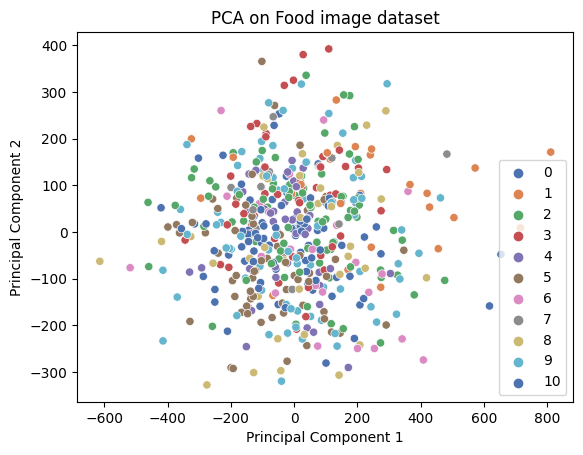

In [47]:
sns.scatterplot(x=train_transformed_data[:,0],y=train_transformed_data[:,1],hue=train_labels_mini_pca,palette="deep")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA on Food image dataset")
plt.show()

Perform MDS on the same dataset:

In [52]:
import random

mini_dataset_size = 500
random.seed(0)
mini_dataset_indices = random.sample(range(len(train_images)), mini_dataset_size)
mini_dataset_indices=np.array(mini_dataset_indices)
train_mini_mds = train_images_np[mini_dataset_indices,:]
train_labels_mini_mds=train_numeric_labels[mini_dataset_indices]
train_mds_data=scaler.fit_transform(train_mini_mds)
train_mds_data.shape

(500, 197904)

In [49]:
mds=MDS(n_components=2)
mds_transformed_data=mds.fit_transform(train_mds_data)
mds_transformed_data.shape

c:\Users\jsarmiento\Documents\Semilla\DATA_SCIENCE\venv_data_science\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(500, 2)

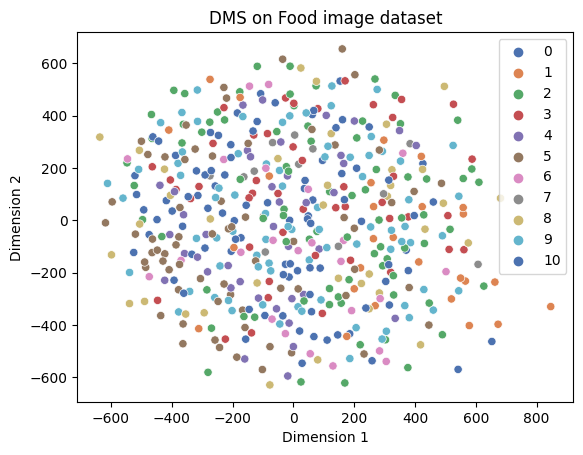

In [53]:
sns.scatterplot(x=mds_transformed_data[:,0],y=mds_transformed_data[:,1],hue=train_labels_mini_mds,palette="deep")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title("DMS on Food image dataset")
plt.show()

In [54]:
import random

mini_dataset_size = 500
random.seed(0)
mini_dataset_indices = random.sample(range(len(train_images)), mini_dataset_size)
mini_dataset_indices=np.array(mini_dataset_indices)
train_mini_tsne = train_images_np[mini_dataset_indices,:]
train_labels_mini_tsne=train_numeric_labels[mini_dataset_indices]
train_tsne_data=scaler.fit_transform(train_mini_tsne)
train_tsne_data.shape

(500, 197904)

In [55]:
tsne=TSNE(n_components=2)
tsne_transformed_data=tsne.fit_transform(train_tsne_data)
tsne_transformed_data.shape

(500, 2)

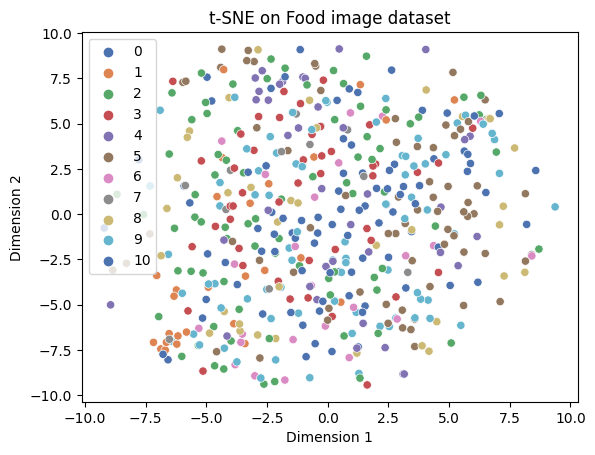

In [57]:
sns.scatterplot(x=tsne_transformed_data[:,0],y=tsne_transformed_data[:,1],hue=train_labels_mini_tsne,palette="deep")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title("t-SNE on Food image dataset")
plt.show()